#### Dataset Description and Preprocessing Steps
Dataset Description: The dataset used in this project consists of student records with the goal of predicting their placement status (placed or not placed). It contains 215 entries with 15 columns, which include various academic and personal attributes such as: \
•	sl_no: Serial number \
•	gender: Gender of the student (binary encoded as 0 or 1) \
•	ssc_p: Secondary Education percentage \
•	ssc_b: Board of Education for secondary education (Central or Others) \
•	hsc_p: Higher Secondary Education percentage \
•	hsc_b: Board of Education for higher secondary education (Central or Others) \
•	hsc_s: Specialization in higher secondary education (Science, Commerce, Arts) \
•	degree_p: Degree percentage \
•	degree_t: Type of undergraduate degree (Sci&Tech, Comm&Mgmt, Others) \
•	workex: Work experience (Yes or No) \
•	etest_p: E-test percentage \
•	specialisation: MBA specialization (Mkt&HR, Mkt&Fin) \
•	mba_p: MBA percentage \
•	status: Placement status (Placed or Not Placed) \
•	salary: Salary offered (only for placed students, with many missing values)


In [57]:
import pandas as pd
import numpy as np

In [58]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [60]:
train_df.describe(include = 'all')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215.000000,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215,148.000000
unique,NaN,NaN,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,2,NaN
top,NaN,NaN,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,Placed,NaN
freq,NaN,NaN,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,148,NaN
mean,108.000000,0.353488,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,NaN,288655.405405
std,62.209324,0.479168,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,NaN,93457.452420
min,1.000000,0.000000,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,NaN,200000.000000
25%,54.500000,0.000000,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,NaN,240000.000000
50%,108.000000,0.000000,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,NaN,265000.000000
75%,161.500000,1.000000,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,NaN,300000.000000


In [61]:
train_df[train_df['salary'].isnull()]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,0,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,0,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,1,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,0,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,1,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,1,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,0,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,0,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,1,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


In [62]:
train_df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [63]:
# Check if all the students who are not placed have salary as null
train_df[train_df['status'] == 'Not Placed']['salary'].isnull().value_counts()

salary
True    67
Name: count, dtype: int64

Handling Missing Values: The salary column has many missing values since it only applies to students who were placed. For this prediction, missing values in salary were not imputed since the focus was on predicting placement status.

### Explanatory Data Analysis

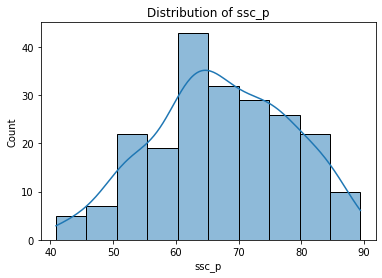

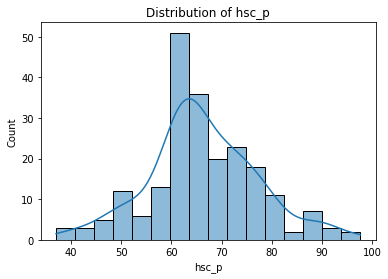

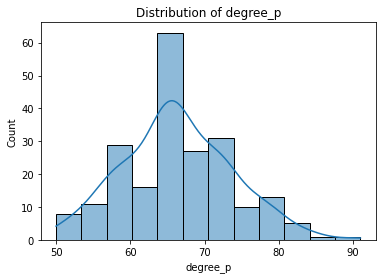

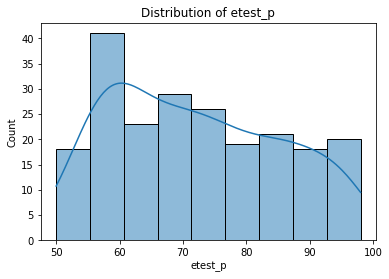

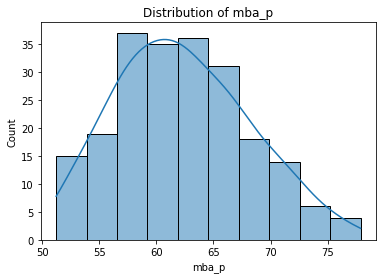

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plots for numerical columns
numerical_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
for col in numerical_cols:
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Insights:

The entrance test (etest_p) seems to differentiate candidates more widely than other assessments.
Undergraduate performance (degree_p) appears more standardized, with a narrow, peaked distribution.
There's a general trend of right-skewness across most metrics, suggesting it's harder to achieve very high scores.
MBA performance (mba_p) shows a tighter distribution, possibly indicating more consistent grading or performance at this level.

These observations could be valuable for understanding academic performance patterns, identifying potential areas for intervention or support, and informing admissions or evaluation criteria. 

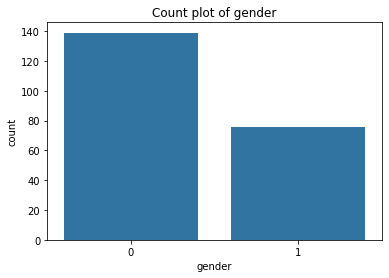

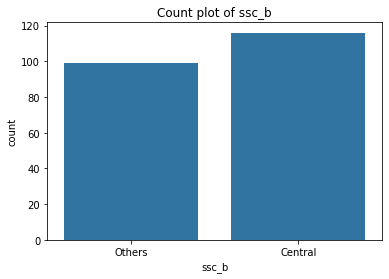

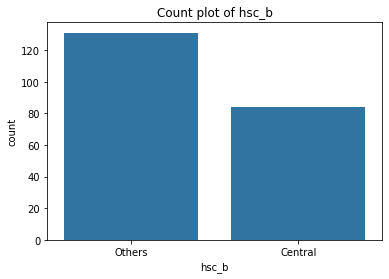

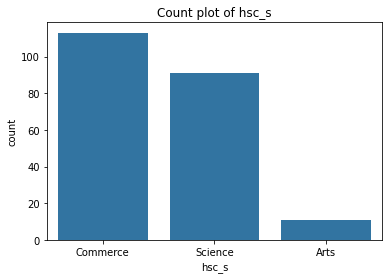

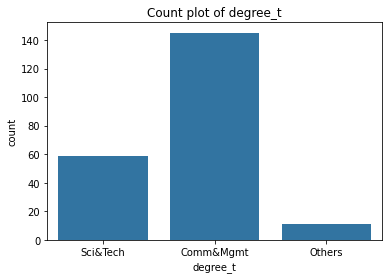

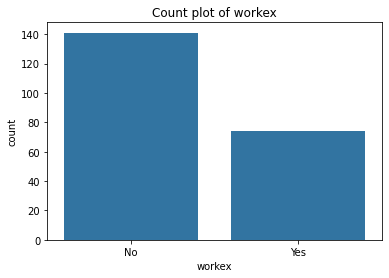

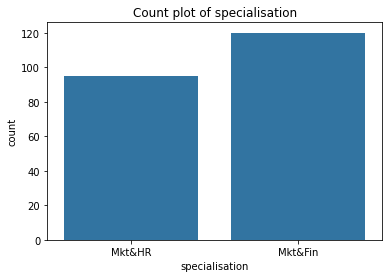

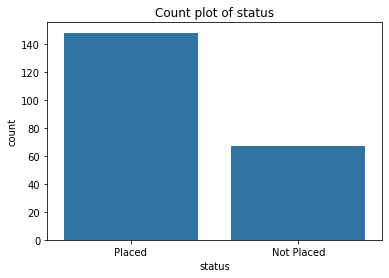

In [65]:
# Count plots for categorical columns
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
for col in categorical_cols:
    sns.countplot(x=col, data=train_df)
    plt.title(f'Count plot of {col}')
    plt.show()

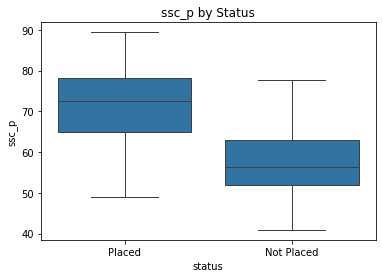

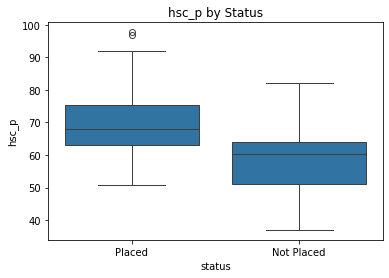

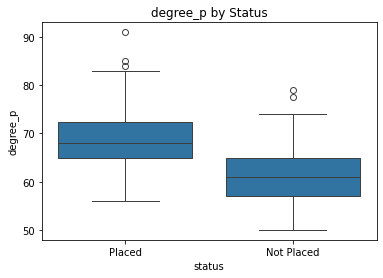

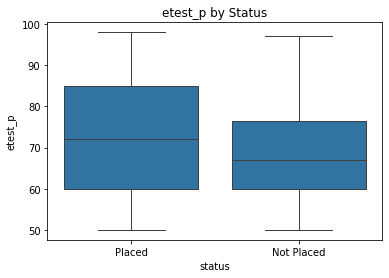

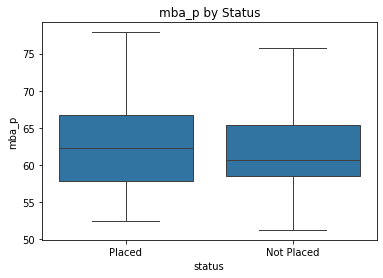

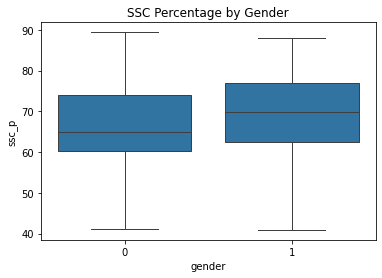

In [66]:
# Box plots for numerical columns grouped by categorical columns
for col in numerical_cols:
    sns.boxplot(x='status', y=col, data=train_df)
    plt.title(f'{col} by Status')
    plt.show()

# Box plot of ssc_p by gender
sns.boxplot(x='gender', y='ssc_p', data=train_df)
plt.title('SSC Percentage by Gender')
plt.show()

For both HSC (Higher Secondary Certificate) and degree percentages, students who were placed tend to have higher scores compared to those who were not placed. The median and interquartile range for placed students are noticeably higher in both cases. This suggests that stronger academic performance in high school (HSC) and during the degree program may contribute to better job placement outcomes. However, there is still some overlap in the distributions, indicating that while higher scores are generally associated with better placement chances, they don't guarantee placement, and lower scores don't necessarily preclude it. The difference seems more pronounced for degree percentages than for HSC scores, potentially indicating that recent academic performance (degree) may have a stronger influence on placement than earlier education (HSC).

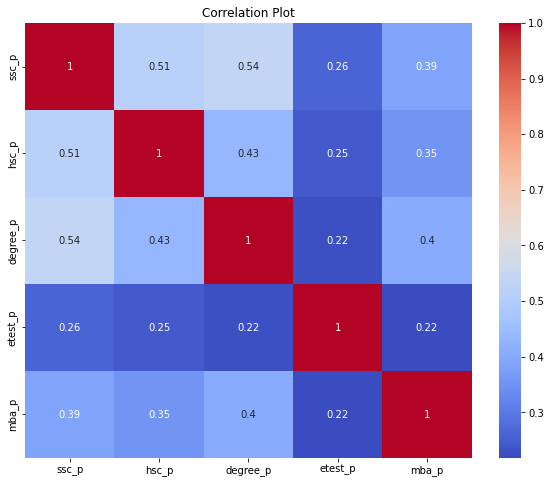

In [100]:
# Calculate the correlation matrix
correlation_matrix = train_df[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

 The strongest correlations appear to be among ssc_p, hsc_p, and degree_p, suggesting a relationship between these academic performance measures. The etest_p variable shows the weakest correlations with other variables.

 We can remove ssc_p column to prevent multicollinearity.

In [102]:
train_df.drop(['ssc_p'], inplace=True, axis=1)

### Encoding Categorical Variables

In [67]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['salary', 'status'], axis=1)
y = train_df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
categorical_cols

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [69]:
X_categorical_cols = categorical_cols[:-1]
X_categorical_cols

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

In [70]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in X_categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

# Encode status with not placed = 0 and placed = 1
y_train = y_train.map({'Not Placed': 0, 'Placed': 1})
y_test = y_test.map({'Not Placed': 0, 'Placed': 1})

### Standard Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])
# Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)
    
# Combine scaled numerical features with categorical features
categorical_cols = [col for col in categorical_cols if col != 'status']
X_train_scaled = pd.concat([X_train_scaled, X_train[categorical_cols]], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test[categorical_cols]], axis=1)    
# Ensure the columns are in the same order: numerical columns first, then categorical
column_order = numerical_cols + categorical_cols
X_train_scaled = X_train_scaled[column_order]
X_test_preprocessed = X_test_scaled[column_order] 
X_train_scaled.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
93,-1.394730,-0.354257,-1.601854,-0.051326,-1.151702,0,0,0,1,0,0,1
84,0.262928,-0.266971,0.517889,-1.326412,-0.038470,0,0,1,2,2,1,0
95,0.539205,1.042309,-0.144531,1.708292,-0.011442,0,0,1,1,0,1,0
137,-0.013348,-0.266971,0.782857,-1.251407,-0.307065,0,1,0,1,0,0,1
210,1.239105,1.391451,1.524767,1.373770,2.071433,0,1,1,1,0,0,0


In [72]:
# Dropping the sl_no column because it is not useful
X_train.drop('sl_no', axis=1, inplace=True)
X_test.drop('sl_no', axis=1, inplace=True)

### Model Selection and Evaluation

##### Evaluation Metrics:
1.	Accuracy: The ratio of correctly predicted instances to the total instances.
2.	Precision: The ratio of true positive predictions to the total positive predictions.
3.	Recall: The ratio of true positive predictions to the actual positive instances.
4.	F1 Score: The harmonic mean of precision and recall, providing a single metric that balances both.
5.	ROC AUC Score: The area under the Receiver Operating Characteristic curve, which evaluates the ability of the model to distinguish between the positive and negative classes.


#### Logistic Regression 

1) Appropriate for binary classification (placed vs. not placed)
2) Provides interpretable results, showing the impact of each feature on placement probability
3) Works well with linear relationships between features and outcome
4) Relatively simple and computationally efficient
5) Good for understanding feature importance and odds ratios

In [73]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred)}')

Accuracy: 0.8837209302325582
Precision: 0.90625
Recall: 0.9354838709677419
f1_score: 0.9206349206349206


##### Hyperparameter Tuning for Logistic Regression

In [75]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.5, 0.6, 0.65, 0.75, 1]
}

# Create the logistic regression model
log_reg = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params_lr = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params_lr)
print("Best Score:", best_score)

Best Parameters: {'C': 0.65}
Best Score: 0.9360013175230566


In [76]:
log_reg = LogisticRegression(**best_params_lr)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision: {precision_score(y_test, y_pred_lr)}')
print(f'Recall: {recall_score(y_test, y_pred_lr)}')
print(f'f1_score: {f1_score(y_test, y_pred_lr)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_lr)}')

Accuracy: 0.8837209302325582
Precision: 0.90625
Recall: 0.9354838709677419
f1_score: 0.9206349206349206
ROC AUC Score: 0.842741935483871


#### Random Forest

1) Can capture non-linear relationships in the data
2) Handles both numerical and categorical variables well
3) Resistant to overfitting due to ensemble nature
4) Provides feature importance rankings
5) Can handle interactions between features automatically

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred)}')

Accuracy: 0.7906976744186046
Precision: 0.8055555555555556
Recall: 0.9354838709677419
f1_score: 0.8656716417910447


##### Hyperparameter Tuning for Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 20, 30, 50, 100],
    'min_samples_split': [2, 5, 10]
}

# Create the random forest classifier model
rf = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params_rf)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9228260869565219


In [81]:
rf = RandomForestClassifier(**best_params_rf)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision: {precision_score(y_test, y_pred_rf)}')
print(f'Recall: {recall_score(y_test, y_pred_rf)}')
print(f'f1_score: {f1_score(y_test, y_pred_rf)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_rf)}')

Accuracy: 0.7906976744186046
Precision: 0.8055555555555556
Recall: 0.9354838709677419
f1_score: 0.8656716417910447
ROC AUC Score: 0.6760752688172043


#### SVM

1) Effective in high-dimensional spaces
2) Versatile due to choice of kernel functions (linear, polynomial, RBF)
3) Works well when there's a clear margin of separation
4) Good at handling complex decision boundaries

In [83]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred)}')

Accuracy: 0.813953488372093
Precision: 0.8285714285714286
Recall: 0.9354838709677419
f1_score: 0.8787878787878788


##### Hyperparameter Tuning for SVM

In [85]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

# Create the SVM model
svm = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='roc_auc')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params_svm = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params_svm)
print("Best Score:", best_score)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9363965744400528


In [86]:
svc = SVC(**best_params_svm, probability=True)
svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'Accuracy: {accuracy_score(y_test, y_pred_svc)}')
print(f'Precision: {precision_score(y_test, y_pred_svc)}')
print(f'Recall: {recall_score(y_test, y_pred_svc)}')
print(f'f1_score: {f1_score(y_test, y_pred_svc)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_svc)}')

Accuracy: 0.8837209302325582
Precision: 0.90625
Recall: 0.9354838709677419
f1_score: 0.9206349206349206
ROC AUC Score: 0.842741935483871


#### Model Evaluation

In [88]:
from sklearn.metrics import classification_report

# Calculate evaluation metrics for logistic regression
log_reg_report = classification_report(y_test, y_pred_lr)
print("Logistic Regression Evaluation Metrics:")
print(log_reg_report)

# Calculate evaluation metrics for random forest
rf_report = classification_report(y_test, y_pred_rf)
print("Random Forest Evaluation Metrics:")
print(rf_report)

# Calculate evaluation metrics for SVM
svc_report = classification_report(y_test, y_pred_svc)
print("SVM Evaluation Metrics:")
print(svc_report)

Logistic Regression Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43

Random Forest Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.81      0.94      0.87        31

    accuracy                           0.79        43
   macro avg       0.76      0.68      0.70        43
weighted avg       0.78      0.79      0.77        43

SVM Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0

Logistic Regression and SVM perform equally well and outperform Random Forest.
All models show better performance on the "Placed" class (1), suggesting the dataset might be imbalanced with more "Placed" instances.
Random Forest struggles with identifying "Not Placed" students (low recall of 0.42 for class 0).
The high precision for class 1 across all models indicates good reliability when predicting a student will be placed.
The support values (12 for class 0, 31 for class 1) confirm the dataset is imbalanced.

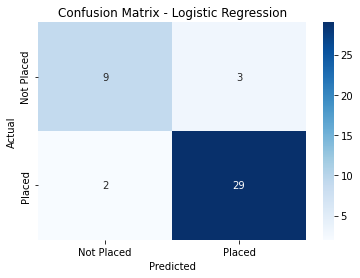

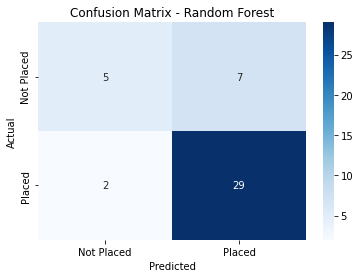

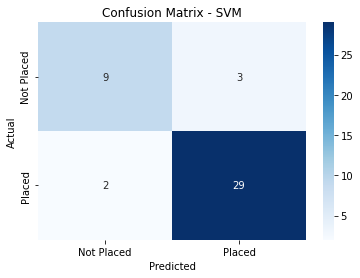

In [89]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Define the labels for the confusion matrix
labels = ['Not Placed', 'Placed']

# Create a confusion matrix for each model
confusion_lr = confusion_matrix(y_test, y_pred_lr)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
confusion_svc = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix for logistic regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_lr, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the confusion matrix for random forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the confusion matrix for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_svc, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Interpretation of Results:

Logistic Regression and SVM:

Very good at identifying students who will be placed (29 out of 31).
Misclassified only 3 students as placed when they weren't.
Correctly identified 9 out of 12 students who weren't placed.

Random Forest:

Equally good at identifying students who will be placed (29 out of 31).
More likely to misclassify students as placed when they weren't (7 false positives).
Only correctly identified 5 out of 12 students who weren't placed.


Implications for Campus Placement:

High Recall (94% for all models): This is crucial for identifying most students who will be placed. It's beneficial for the institution's reputation and for not missing opportunities to support promising candidates.
Precision (91% for Logistic Regression/SVM, 81% for Random Forest): Higher precision means fewer false hopes given to students. Logistic Regression and SVM are better in this regard.
False Positives: These could lead to overconfidence in some students who might not prepare adequately for job searches. Random Forest has more of these, which could be problematic.
False Negatives: All models miss 2 students who actually get placed. This could result in not providing enough support to some deserving candidates.


Model Selection for Campus Placement:

Logistic Regression or SVM would be preferable here. They balance well between identifying most placed students and not giving false hope to too many unplaced students.
Random Forest, while good at identifying placed students, might create too much false optimism by overpredicting placement.

In conclusion, while all models perform reasonably well, Logistic Regression and SVM show slightly better and more balanced performance across all metrics compared to Random Forest in this specific classification task.

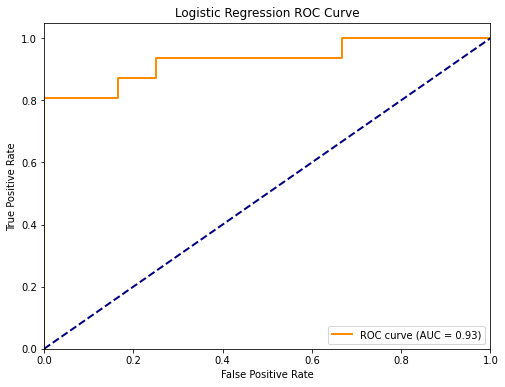

In [90]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for Logistic Regression
y_score_log_reg = log_reg.predict_proba(X_test_scaled)[:, -1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_score_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Plot ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

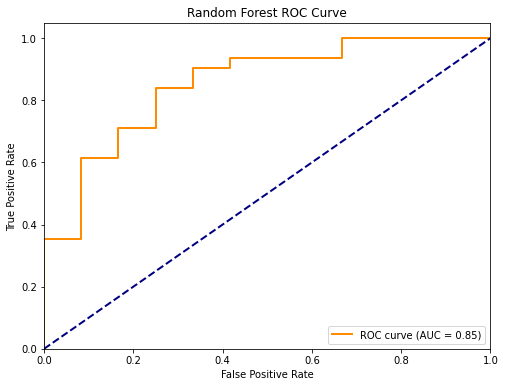

In [91]:
# Predict probabilities for Random Forest
y_score_rf = rf.predict_proba(X_test)[:, -1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()


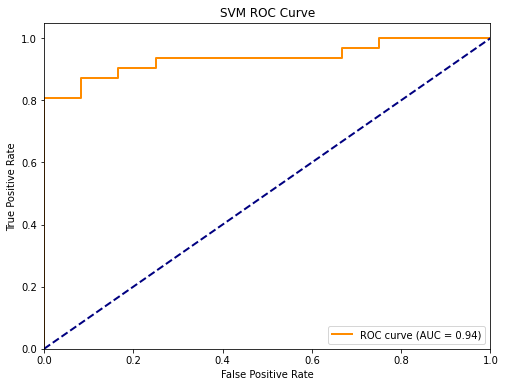

In [92]:
# Predict probabilities for SVM
y_score_svm = svc.predict_proba(X_test_scaled)[:, -1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()


Comparing the ROC curves and AUC values of the three models reveals that SVM performs best with an AUC of 0.94, followed closely by Logistic Regression at 0.93, while Random Forest lags slightly with an AUC of 0.85. All models demonstrate good discriminative ability, significantly outperforming random chance. SVM and Logistic Regression show similar performance patterns with steep initial curves, indicating high true positive rates even at low false positive rates. Random Forest, while still performing well, has a more gradual curve and lower true positive rates at low false positive thresholds. The choice between SVM and Logistic Regression might depend on whether non-linear relationships or interpretability is more important for the specific application, while Random Forest could be considered if ensemble methods or feature importance are desired despite its slightly lower overall performance.

In [93]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', LogisticRegression(**best_params_lr)),
        ('random_forest', RandomForestClassifier(**best_params_rf)),
        ('svm', SVC(**best_params_svm, probability=True))
    ],
    voting='soft'  # Use soft voting for probability-based predictions,
)

# Fit the voting classifier to the training data
voting_clf.fit(X_train_scaled, y_train)

# Predict the target variable using the voting classifier
y_pred_voting = voting_clf.predict(X_test_scaled)

# Evaluate the performance of the voting classifier

print(f'Accuracy: {accuracy_score(y_test, y_pred_voting)}')
print(f'Precision: {precision_score(y_test, y_pred_voting)}')
print(f'Recall: {recall_score(y_test, y_pred_voting)}')
print(f'f1_score: {f1_score(y_test, y_pred_voting)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_voting)}')

Accuracy: 0.8604651162790697
Precision: 0.8787878787878788
Recall: 0.9354838709677419
f1_score: 0.90625
ROC AUC Score: 0.8010752688172044


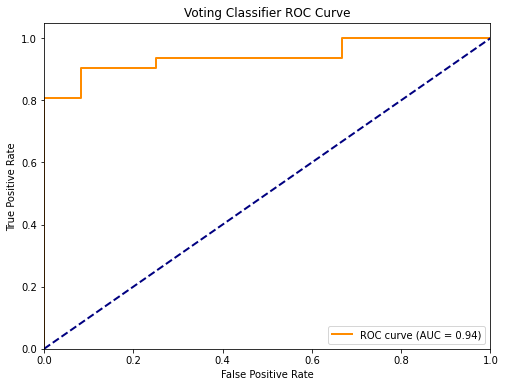

In [97]:
# Predict probabilities for SVM
y_score_voting = voting_clf.predict_proba(X_test_scaled)[:, -1]
fpr_voting, tpr_voting, _ = roc_curve(y_test, y_score_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Voting Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()


The Voting Classifier demonstrates strong performance with an AUC of 0.94, matching the best individual model (SVM) from the previous results. This indicates that the ensemble approach effectively combines the strengths of Logistic Regression (AUC 0.93), Random Forest (AUC 0.85), and SVM (AUC 0.94) without degrading performance. The Voting Classifier maintains the high discrimination ability of the best model, as evidenced by its steep ROC curve, particularly at low false positive rates. While it doesn't surpass the top individual model, it equals its performance, suggesting that the voting strategy successfully leverages the collective predictive power of all three models. This result highlights the potential benefits of ensemble methods in achieving robust and reliable predictions across different classification thresholds.

#### Conclusion

The models evaluated show varying performances across different metrics. Logistic Regression and Support Vector Machine (SVM) models performed similarly well, achieving high accuracy, precision, recall, and F1 scores, with ROC AUC scores of 84%. The Random Forest Classifier had lower performance in terms of accuracy, ROC AUC, and precision, indicating it might not be as effective for this dataset. The Voting Classifier, an ensemble method, performed well overall, achieving balanced results with a high recall of 94% and an F1 score of 91%, making it a robust choice for this classification task.